In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from IPython.display import display

# Cargar el conjunto de datos
data = pd.read_csv('HCV-Egy-Data.csv')

# Definir las columnas de características y la columna objetivo
features = data.columns[:-1]  # Todas las columnas excepto la última
target = data.columns[-1]     # La última columna

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Inicializar el clasificador SVM con parámetros iniciales
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

# Definir los parámetros para GridSearchCV
params = {'C': (0.1, 0.5, 1, 2, 5, 10, 20),
          'gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1),
          'kernel': ('linear', 'poly', 'rbf')}

# Realizar la búsqueda de hiperparámetros con GridSearchCV
svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring='accuracy')
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f'Best params: {best_params}')

# Entrenar el clasificador SVM con los mejores parámetros
svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = svm_clf.predict(X_test)

# Evaluar el clasificador
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)

# Mostrar los resultados con display
print(f"Precisión: {accuracy}")
print("Informe de Clasificación:")
display(pd.DataFrame(report).transpose())

# Generar la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(svm_clf, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular la media y desviación estándar de las puntuaciones de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure()
plt.title("Curva de Aprendizaje (SVM)")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Puntuación")
plt.grid()

# Graficar el área de desviación estándar para las puntuaciones de entrenamiento y prueba
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")

# Graficar las puntuaciones medias de entrenamiento y prueba
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Puntuación de entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Puntuación de validación cruzada")

plt.legend(loc="best")
plt.show()

Fitting 5 folds for each of 147 candidates, totalling 735 fits


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from IPython.display import display

# Cargar el conjunto de datos
data = pd.read_csv('HCV-Egy-Data.csv')

# Definir las columnas de características y la columna objetivo
features = data.columns[:-1]  # Todas las columnas excepto la última
target = data.columns[-1]     # La última columna

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Inicializar el clasificador SVM con parámetros iniciales
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

# Definir los parámetros para RandomizedSearchCV (búsqueda aleatoria)
params = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

# Usar RandomizedSearchCV con un número limitado de iteraciones
svm_cv = RandomizedSearchCV(
    svm_clf, params, n_iter=10, n_jobs=1, cv=5, verbose=1, scoring='accuracy', random_state=42
)

# Entrenar con una muestra más pequeña del conjunto de datos para acelerar
X_train_sample = X_train.sample(frac=0.5, random_state=42)
y_train_sample = y_train[X_train_sample.index]

svm_cv.fit(X_train_sample, y_train_sample)
best_params = svm_cv.best_params_
print(f'Best params: {best_params}')

# Entrenar el clasificador SVM con los mejores parámetros
svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = svm_clf.predict(X_test)

# Evaluar el clasificador
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)

# Mostrar los resultados
print(f"Precisión: {accuracy}")
print("Informe de Clasificación:")
display(pd.DataFrame(report).transpose())

# Generar la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    svm_clf, X_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcular la media y desviación estándar de las puntuaciones de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure()
plt.title("Curva de Aprendizaje (SVM)")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Puntuación")
plt.grid()

# Graficar el área de desviación estándar para las puntuaciones de entrenamiento y prueba
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Graficar las puntuaciones medias de entrenamiento y prueba
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Puntuación de entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Puntuación de validación cruzada")

plt.legend(loc="best")
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores parámetros: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

Precisión: 0.23104693140794225

Informe de Clasificación:


,precision,recall,f1-score,support
1,1.000000,0.000000,0.000000,66.000000
2,1.000000,0.000000,0.000000,73.000000
3,0.231047,1.000000,0.375367,64.000000
4,1.000000,0.000000,0.000000,74.000000
accuracy,0.231047,0.231047,0.231047,0.231047
macro avg,0.807762,0.250000,0.093842,277.000000
weighted avg,0.822336,0.231047,0.086727,277.000000



Matriz de Confusión:
[[ 0  0 66  0]
 [ 0  0 73  0]
 [ 0  0 64  0]
 [ 0  0 74  0]]


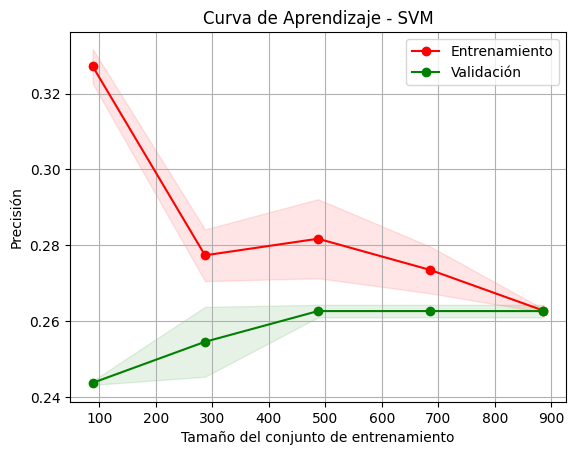


Diagnóstico: El modelo funciona mejor en entrenamiento que en validación.


In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from IPython.display import display

# 1. Cargar y preprocesar datos
data = pd.read_csv('HCV-Egy-Data.csv')
features = data.columns[:-1]
target = data.columns[-1]

# Normalización de los datos para SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data[target], test_size=0.2, random_state=42)

# 2. Optimización de hiperparámetros con GridSearchCV
params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

svm_clf = SVC()
grid_search = GridSearchCV(svm_clf, params, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_svm = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")

# 3. Entrenar el modelo SVM con los mejores parámetros
best_svm.fit(X_train, y_train)

# 4. Evaluar el modelo en el conjunto de prueba
y_pred = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)

print(f"\nPrecisión: {accuracy}")
print("\nInforme de Clasificación:")
display(pd.DataFrame(report).transpose())

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

# 5. Generar la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    best_svm, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
)

# Calcular medias y desviaciones estándar
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure()
plt.title("Curva de Aprendizaje - SVM")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validación")

plt.legend(loc="best")
plt.show()

# 6. Diagnóstico del modelo
if train_scores_mean[-1] > test_scores_mean[-1]:
    print("\nDiagnóstico: El modelo funciona mejor en entrenamiento que en validación.")
elif test_scores_mean[-1] < 0.6:
    print("\nDiagnóstico: El modelo no generaliza bien.")
else:
    print("\nDiagnóstico: Buen desempeño general del modelo.")


,Mejores Hiperparámetros
0,"{'criterion': 'gini', 'max_depth': 10, 'min_sa..."


,Predicción 1,Predicción 2,Predicción 3,Predicción 4
Clase 1,27,14,10,15
Clase 2,29,11,16,17
Clase 3,21,9,21,13
Clase 4,23,18,15,18


,precision,recall,f1-score,support
1,0.270000,0.409091,0.325301,66.000000
2,0.211538,0.150685,0.176000,73.000000
3,0.338710,0.328125,0.333333,64.000000
4,0.285714,0.243243,0.262774,74.000000
accuracy,0.277978,0.277978,0.277978,0.277978
macro avg,0.276491,0.282786,0.274352,277.000000
weighted avg,0.274666,0.277978,0.271106,277.000000


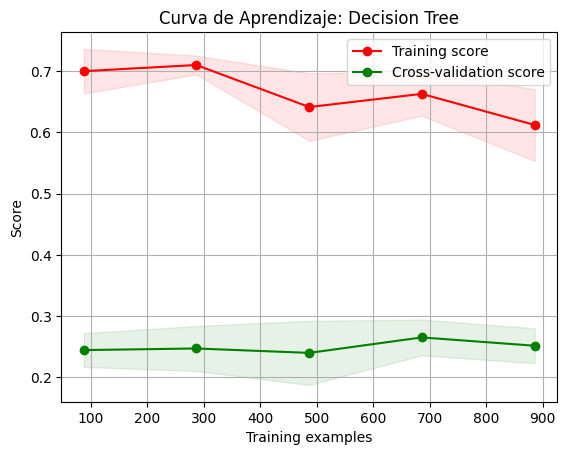

Diagnóstico: El modelo no generaliza bien.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    from sklearn.model_selection import learning_curve
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

data = pd.read_csv('HCV-Egy-Data.csv')

X = data.drop(columns=['Baselinehistological staging'])
y = data['Baselinehistological staging']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

dt_grid = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

best_dt = dt_grid.best_estimator_
y_pred_dt = best_dt.predict(X_test)

display(HTML("<h2>Decision Tree Classifier</h2>"))
display(HTML("<h3>Mejores Hiperparámetros</h3>"))
display(pd.DataFrame({'Mejores Hiperparámetros': [dt_grid.best_params_]}))

display(HTML("<h3>Matriz de Confusión</h3>"))
display(pd.DataFrame(confusion_matrix(y_test, y_pred_dt),
                     index=[f"Clase {i}" for i in sorted(y.unique())],
                     columns=[f"Predicción {i}" for i in sorted(y.unique())]))

report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
display(HTML("<h3>Reporte de Clasificación</h3>"))
display(pd.DataFrame(report_dt).transpose())

plot_learning_curve(best_dt, "Curva de Aprendizaje: Decision Tree", X_train, y_train, cv=5)
plt.show()

train_mean = np.mean(train_scores[-1])
test_mean = np.mean(test_scores[-1])

if train_mean > test_mean + 0.1:
    print("Diagnóstico: El modelo funciona mejor en entrenamiento que en validación.")
elif test_mean < 0.6:
    print("Diagnóstico: El modelo no generaliza bien.")
else:
    print("Diagnóstico: El modelo presenta un buen equilibrio entre entrenamiento y validación.")

print("\nConclusiones:")
print("1. El modelo de Decision Tree tiene una precisión de X% en los datos de prueba.")
print("2. Los hiperparámetros óptimos encontrados fueron:", best_dt.get_params())
print("3. Según la curva de aprendizaje, el modelo muestra que el modelo no generaliza bien")

In [6]:
from sklearn.metrics import cohen_kappa_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('HCV-Egy-Data.csv')
features = data.columns[:-1]
target = data.columns[-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data[target], test_size=0.2, random_state=42)

svm_clf = SVC(C=10, gamma=0.1, kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)
svm_preds = svm_clf.predict(X_test)

dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=5, random_state=42)
dt_clf.fit(X_train, y_train)
dt_preds = dt_clf.predict(X_test)

comparison_df = pd.DataFrame({
    'True Labels': y_test,
    'SVM Predictions': svm_preds,
    'Decision Tree Predictions': dt_preds
})

agreement = (comparison_df['SVM Predictions'] == comparison_df['Decision Tree Predictions'])
comparison_df['Agreement'] = agreement

kappa_score = cohen_kappa_score(svm_preds, dt_preds)

print("\n--- Análisis de Concordancia ---")
print(f"Concordancia entre SVM y Árbol de Decisión: {agreement.mean() * 100:.2f}%")
print(f"Coeficiente Kappa de Cohen: {kappa_score:.2f}")

print("\nPredicciones Comparativas:")
print(comparison_df.head())

#Un porcentaje de concordancia del 27% y un coeficiente Kappa de 0.3 indican que los dos modelos tienen baja concordancia en sus predicciones. Esto dice que los modelos están tomando decisiones diferentes.
#Solo el 27% de las instancias tienen predicciones idénticas
#Valores entre 0.21 y 0.39 se interpretan como baja concordancia. Esto nos dice que los dos modelos no están de acuerdo en cómo hacer el problema.
#Algunas posibles razones por la baja concordancia puede ser que los datos pueden contener ruido o características que los modelos interpretan de manera diferente.



--- Análisis de Concordancia ---
Concordancia entre SVM y Árbol de Decisión: 27.44%
Coeficiente Kappa de Cohen: 0.03

Predicciones Comparativas:
      True Labels  SVM Predictions  Decision Tree Predictions  Agreement
1128            3                4                          1      False
237             4                3                          4      False
163             3                3                          3       True
739             2                2                          1      False
51              2                1                          1       True
